<h1>INCEPTION V3 <h1>

C:\Users\ramav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5588 - loss: 1.3780 - val_accuracy: 0.7980 - val_loss: 0.5999
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7725 - loss: 0.6300 - val_accuracy: 0.8450 - val_loss: 0.4220
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8102 - loss: 0.5320 - val_accuracy: 0.8460 - val_loss: 0.4196
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.8424 - loss: 0.4454 - val_accuracy: 0.8620 - val_loss: 0.3778
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8510 - loss: 0.4233 - val_accuracy: 0.8580 - val_loss: 0.3648
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8668 - loss: 0.3722 - val_accuracy: 0.8590 - val_loss: 0.4079
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8755 - loss: 0.3605 - val_accuracy: 0.8600 - val_loss: 0.3758
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8655 - loss: 0.3783 - val_acc

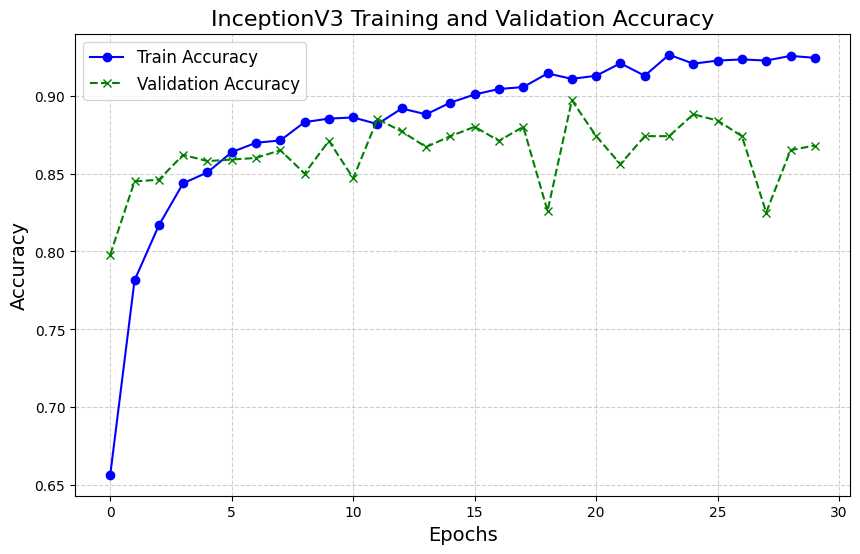

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
InceptionV3 Classification Report:
              precision    recall  f1-score   support

      Broken       0.83      0.91      0.87       201
    Immature       0.98      0.86      0.92       225
      Intact       0.90      0.94      0.92       241
Skin-Damaged       0.89      0.90      0.89       226
     Spotted       0.88      0.84      0.86       107

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load extracted DenseNet features
densenet_train_features, train_labels, densenet_test_features, test_labels = joblib.load('densenet_features.joblib')

# InceptionV3-based Model Architecture
inception_classifier = Sequential([
    Dense(1024, activation='relu', input_shape=(1024,)),  # Input shape matches DenseNet feature size
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Number of output classes
])

inception_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model saving
inception_checkpoint = ModelCheckpoint('inception_v3.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the InceptionV3 model using DenseNet features
inception_history = inception_classifier.fit(
    densenet_train_features, train_labels,
    epochs=50,
    validation_data=(densenet_test_features, test_labels),
    callbacks=[inception_checkpoint, early_stop]
)


# Plot InceptionV3 accuracy graphs
plt.figure(figsize=(10, 6))  # Larger figure size for better readability
plt.plot(inception_history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(inception_history.history['val_accuracy'], label='Validation Accuracy', color='green', linestyle='--', marker='x')
plt.title('InceptionV3 Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Classification Report for InceptionV3
inception_predictions = inception_classifier.predict(densenet_test_features)
inception_pred_labels = inception_predictions.argmax(axis=1)
print("InceptionV3 Classification Report:")
print(classification_report(test_labels.argmax(axis=1), inception_pred_labels, target_names=['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']))


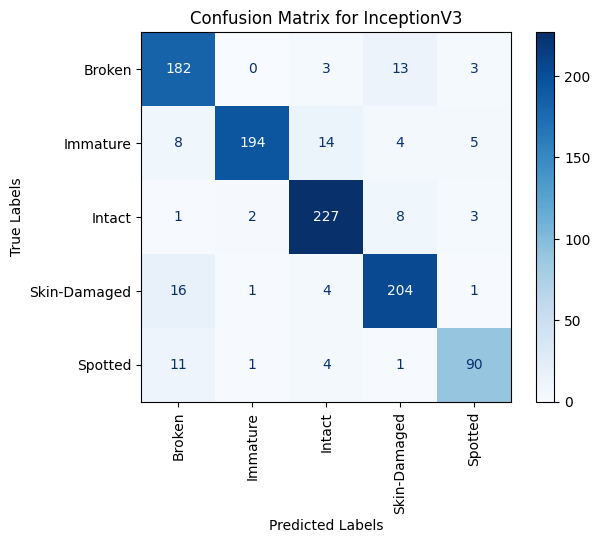

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for InceptionV3 predictions
conf_matrix_inception = confusion_matrix(test_labels.argmax(axis=1), inception_pred_labels)

# Define class names (modify based on your dataset)
class_names = ['Broken', 'Immature', 'Intact', 'Skin-Damaged', 'Spotted']

# Visualize the confusion matrix
disp_inception = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_inception, display_labels=class_names)
disp_inception.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Add title and labels
plt.title("Confusion Matrix for InceptionV3")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()